In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("data_YesBank_StockPrices.csv")
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


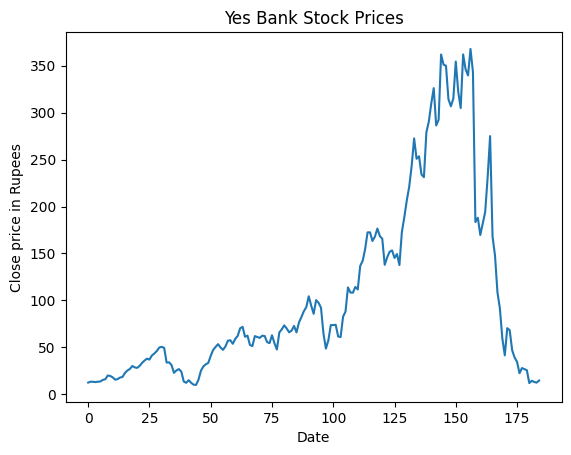

In [ ]:
#visualizing the close prices of each day
close = df['Close']
ax = close.plot(title='Yes Bank Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Close price in Rupees')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df[["Date", "Close"]]

In [ ]:
# Extracting month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Splitting the dataset into training and testing sets
X = df[['Month', 'Year']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the testing set
y_pred = model.predict(X_test)



<ipython-input-105-49d85724b317>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-49d85724b317>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 6179.296259801344
R-squared: 0.31636129644880473


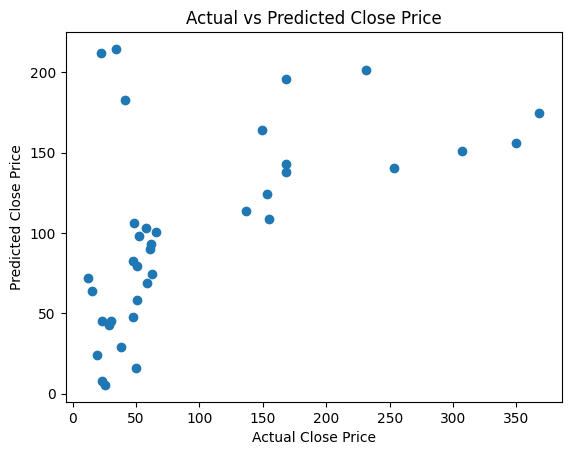

In [ ]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.show()


**Predicting the Close Value of the stock for the next 5 years**

In [ ]:

# Extending the DataFrame to include future dates
future_dates = pd.date_range(start=df['Date'].max(), periods=60, freq='M')  # 5 years with monthly frequency
future_df


,Date,Month,Year,Close
0,2020-11-30,11,2020,190.662943
1,2020-12-31,12,2020,187.997852
2,2021-01-31,1,2021,230.538777
3,2021-02-28,2,2021,227.873686
4,2021-03-31,3,2021,225.208594
5,2021-04-30,4,2021,222.543503
6,2021-05-31,5,2021,219.878411
7,2021-06-30,6,2021,217.213320
8,2021-07-31,7,2021,214.548228
9,2021-08-31,8,2021,211.883137


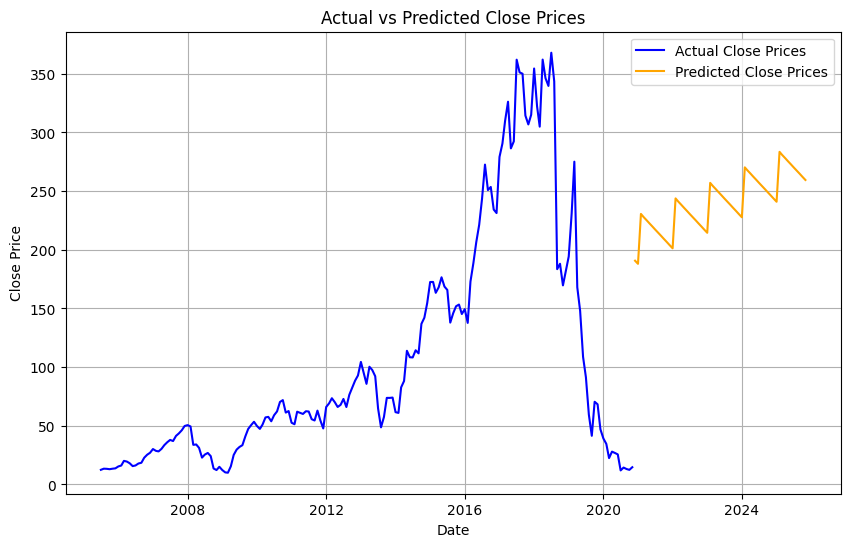

In [ ]:
# Extend the DataFrame to include future dates
future_df = pd.DataFrame({'Date': future_dates})
future_df['Month'] = future_df['Date'].dt.month
future_df['Year'] = future_df['Date'].dt.year

# Predicting stock prices for future dates
future_df['Close'] = model.predict(future_df[['Month', 'Year']])

# Plotting the current and future trends
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Prices', color='blue')
plt.plot(future_df['Date'], future_df['Close'], label='Predicted Close Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predicting stock prices for current and future dates
df['Predicted_Close'] = model.predict(X)

# Converting 'Date' to ordinal values
df['Date_Ordinal'] = df['Date'].apply(lambda date: date.toordinal())




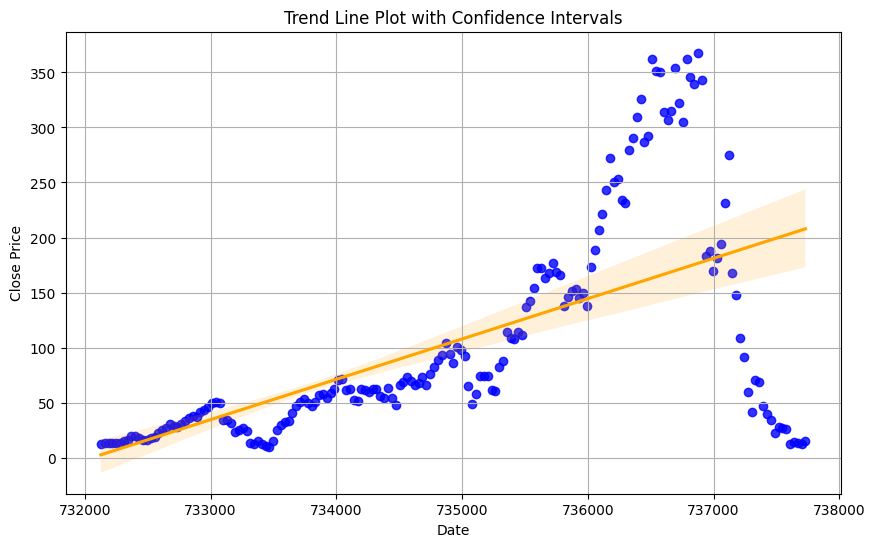

In [ ]:
# Trend Line Plot with Confidence Intervals
plt.figure(figsize=(10, 6))
sns.regplot(x='Date_Ordinal', y='Close', data=df, ci=95, scatter_kws={"color": "blue"}, line_kws={"color": "orange"})
plt.title('Trend Line Plot with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()




**Some other visualizations:**

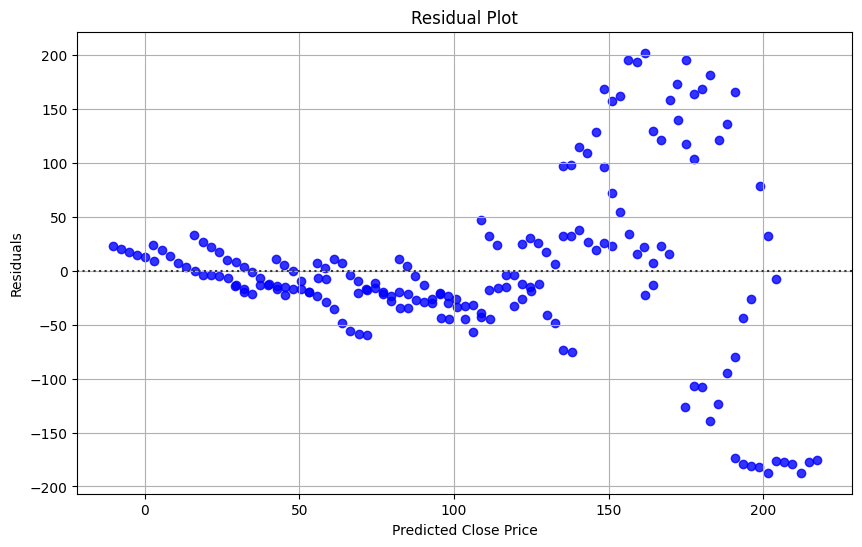

In [ ]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Predicted_Close', y='Close', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "orange"})
plt.title('Residual Plot')
plt.xlabel('Predicted Close Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



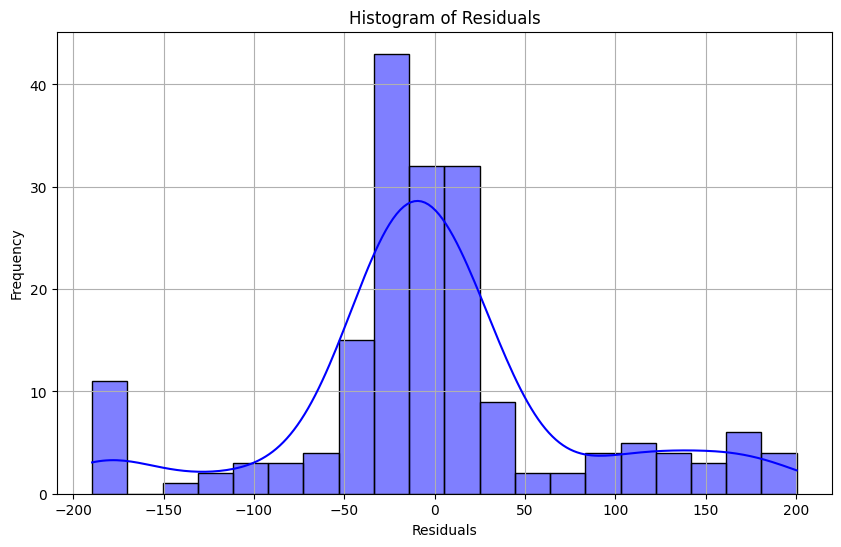

In [ ]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'] - df['Predicted_Close'], bins=20, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


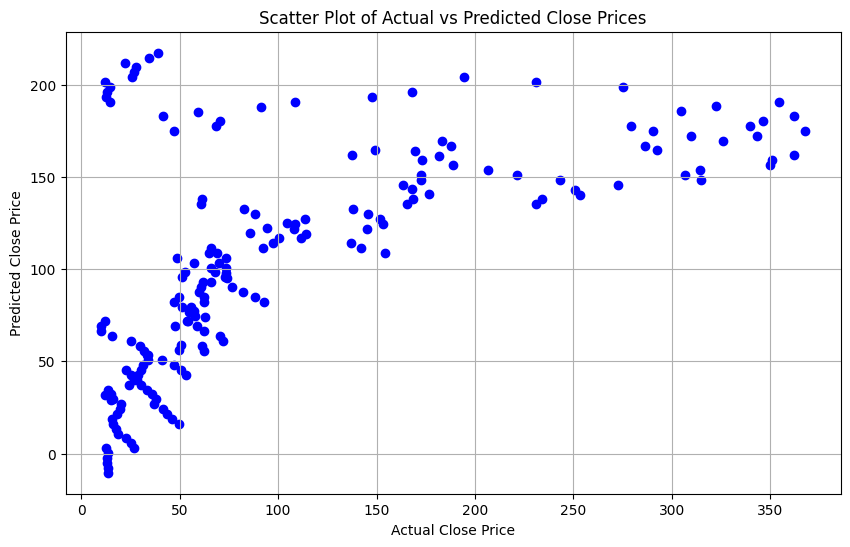

In [ ]:
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(df['Close'], df['Predicted_Close'], color='blue')
plt.title('Scatter Plot of Actual vs Predicted Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.grid(True)
plt.show()